In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set( rc={'figure.figsize':(16,10)} )

# Cumulative Rewards

In [41]:
cr = pd.read_excel('CumulativeReward.xlsx')
cr['Details'] = cr['Model'] + ' ( N=' + cr['Steps'].astype(str) + ', H=' + cr['Horizon'].astype(str) + ' )'
cr.sort_values( by=['Details'], inplace=True )
cr.head( )

,Slippery,Model,Horizon,Steps,Episode,CumulativeReward,Details
4249,True,FHTD,1,1,250,-1334.00,"FHTD ( N=1, H=1 )"
4340,True,FHTD,1,1,341,-1158.35,"FHTD ( N=1, H=1 )"
4339,True,FHTD,1,1,340,-1168.35,"FHTD ( N=1, H=1 )"
4338,True,FHTD,1,1,339,-1169.55,"FHTD ( N=1, H=1 )"
4337,True,FHTD,1,1,338,-1171.85,"FHTD ( N=1, H=1 )"


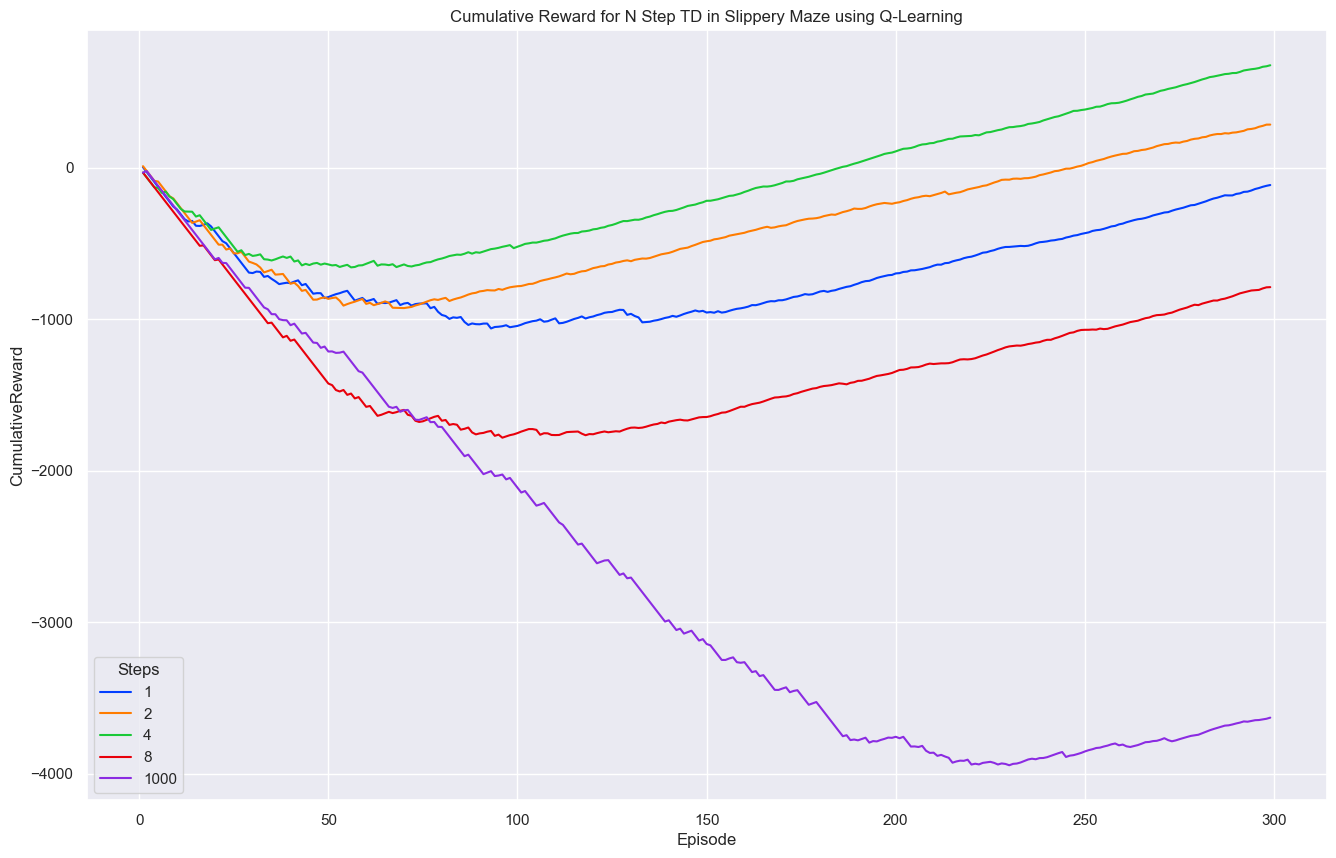

In [42]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Model']=='NSTEP') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Steps', palette='bright' )
plt.title( 'Cumulative Reward for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

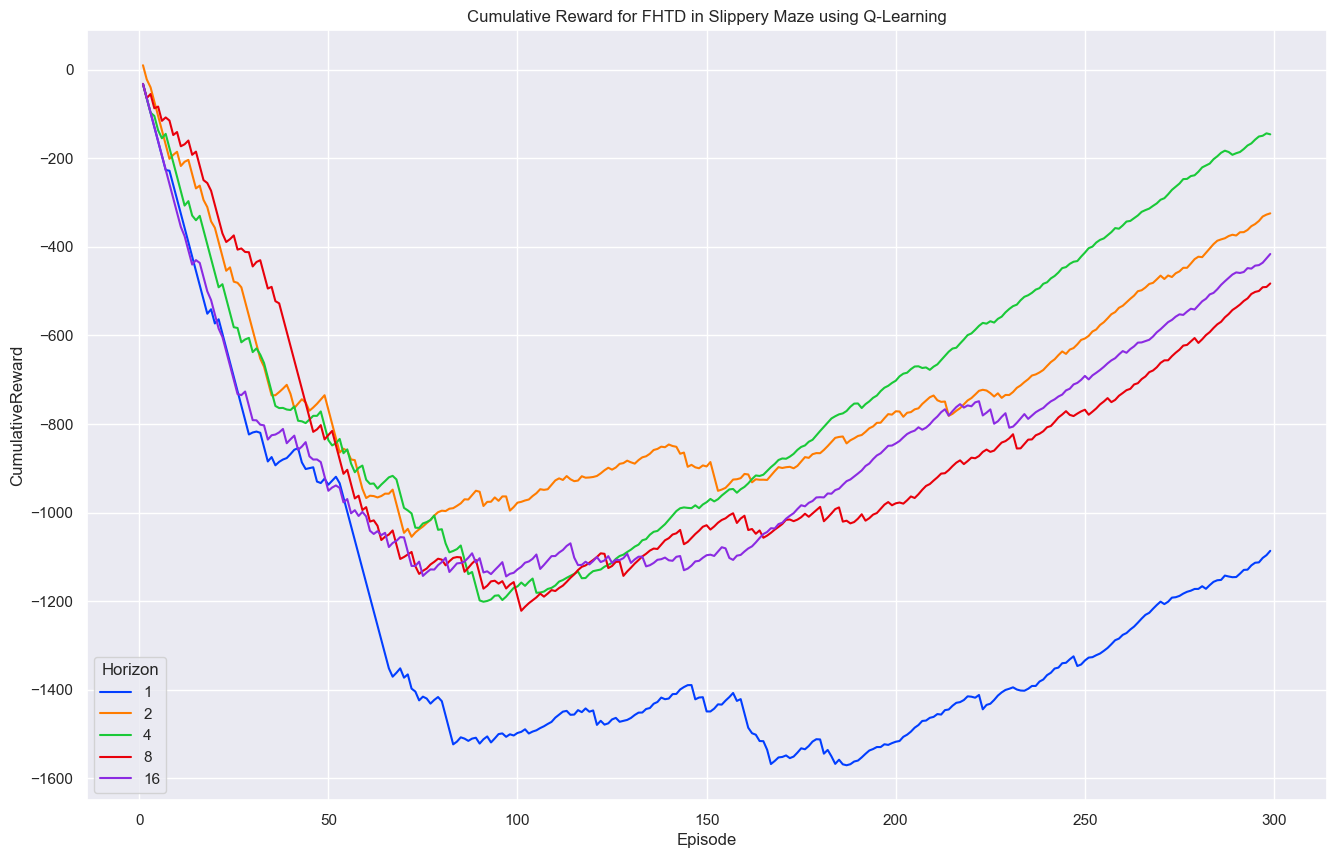

In [43]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Model']=='FHTD') & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Horizon', palette='bright' )
plt.title( 'Cumulative Reward for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

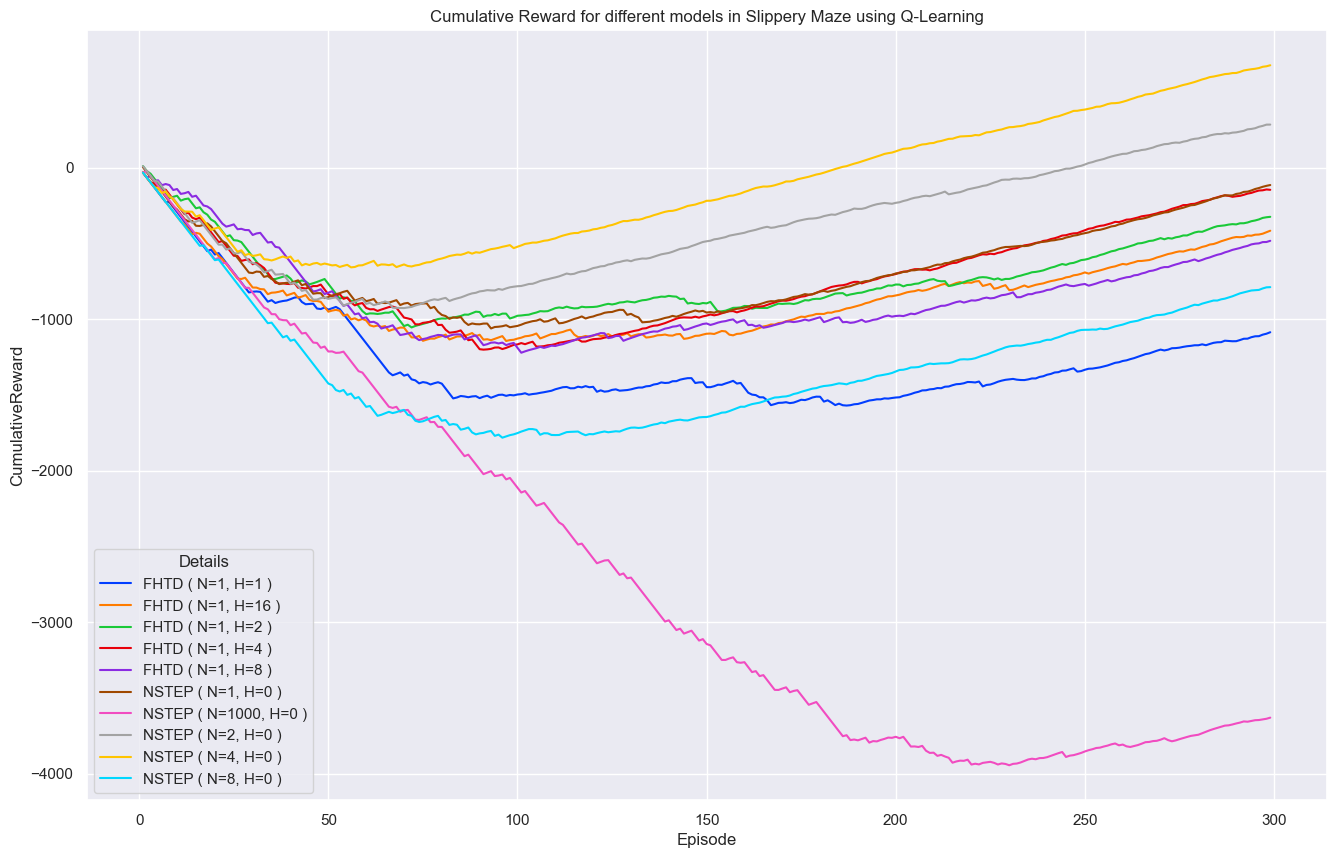

In [44]:
sns.lineplot( data=cr[(cr['Slippery']==True) & (cr['Episode']<300)], x='Episode', y='CumulativeReward', hue='Details', palette='bright' )
plt.title( 'Cumulative Reward for different models in Slippery Maze using Q-Learning' )
plt.show( )

# Convergence / Win Rate over Episodes

In [45]:
wr = pd.read_excel( 'WinRate.xlsx' )
wr['Details'] = wr['Model'] + ' ( N=' + wr['Steps'].astype(str) + ', H=' + wr['Horizon'].astype(str) + ' )'
wr.sort_values( by=['Details'], inplace=True )
wr.head( )

,Slippery,Model,Horizon,Steps,Episode,WinRate,Details
849,True,FHTD,1,1,250,1.000000,"FHTD ( N=1, H=1 )"
871,True,FHTD,1,1,360,1.000000,"FHTD ( N=1, H=1 )"
870,True,FHTD,1,1,355,1.000000,"FHTD ( N=1, H=1 )"
869,True,FHTD,1,1,350,0.977273,"FHTD ( N=1, H=1 )"
868,True,FHTD,1,1,345,1.000000,"FHTD ( N=1, H=1 )"


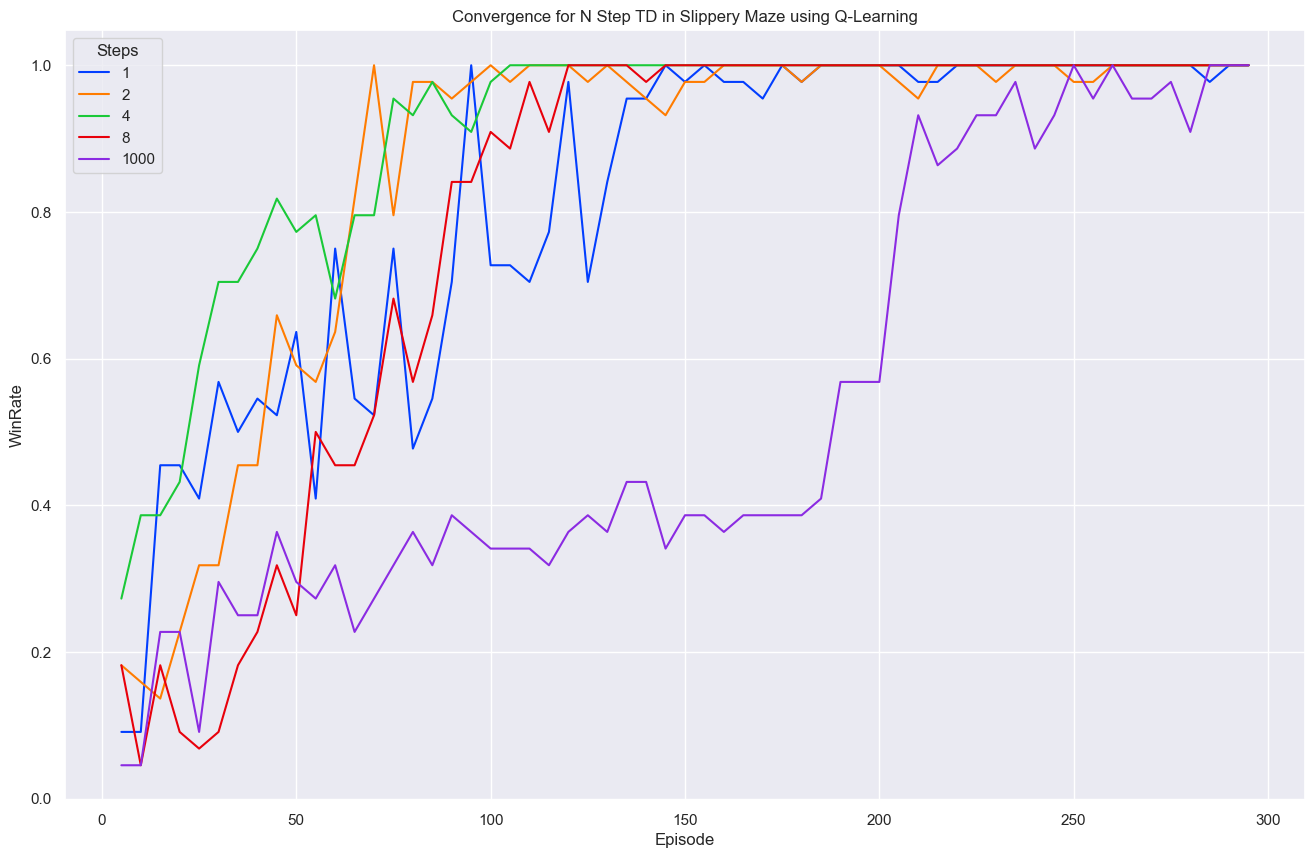

In [46]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']=='NSTEP') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Steps', palette='bright' )
plt.title( 'Convergence for N Step TD in Slippery Maze using Q-Learning' )
plt.show( )

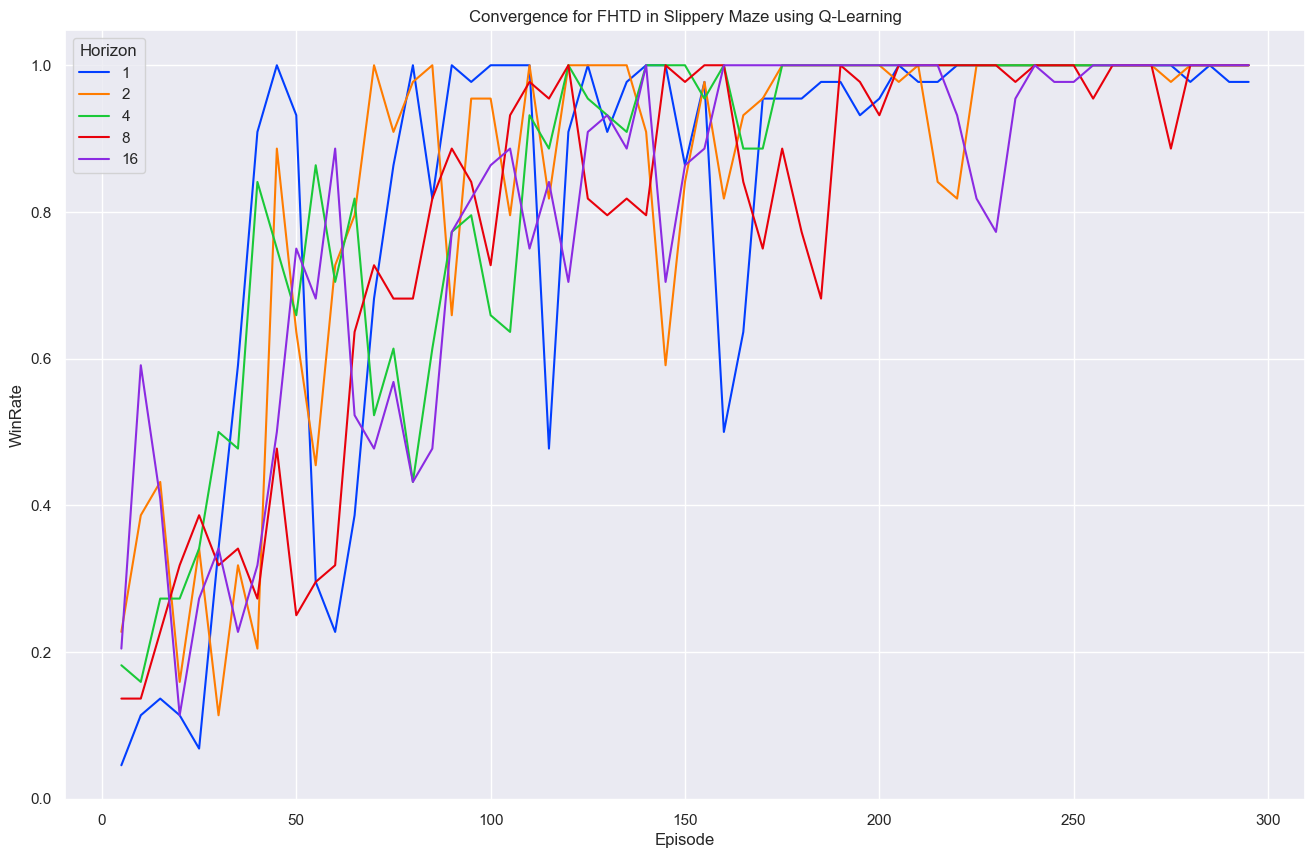

In [47]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Model']=='FHTD') & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Horizon', palette='bright' )
plt.title( 'Convergence for FHTD in Slippery Maze using Q-Learning' )
plt.show( )

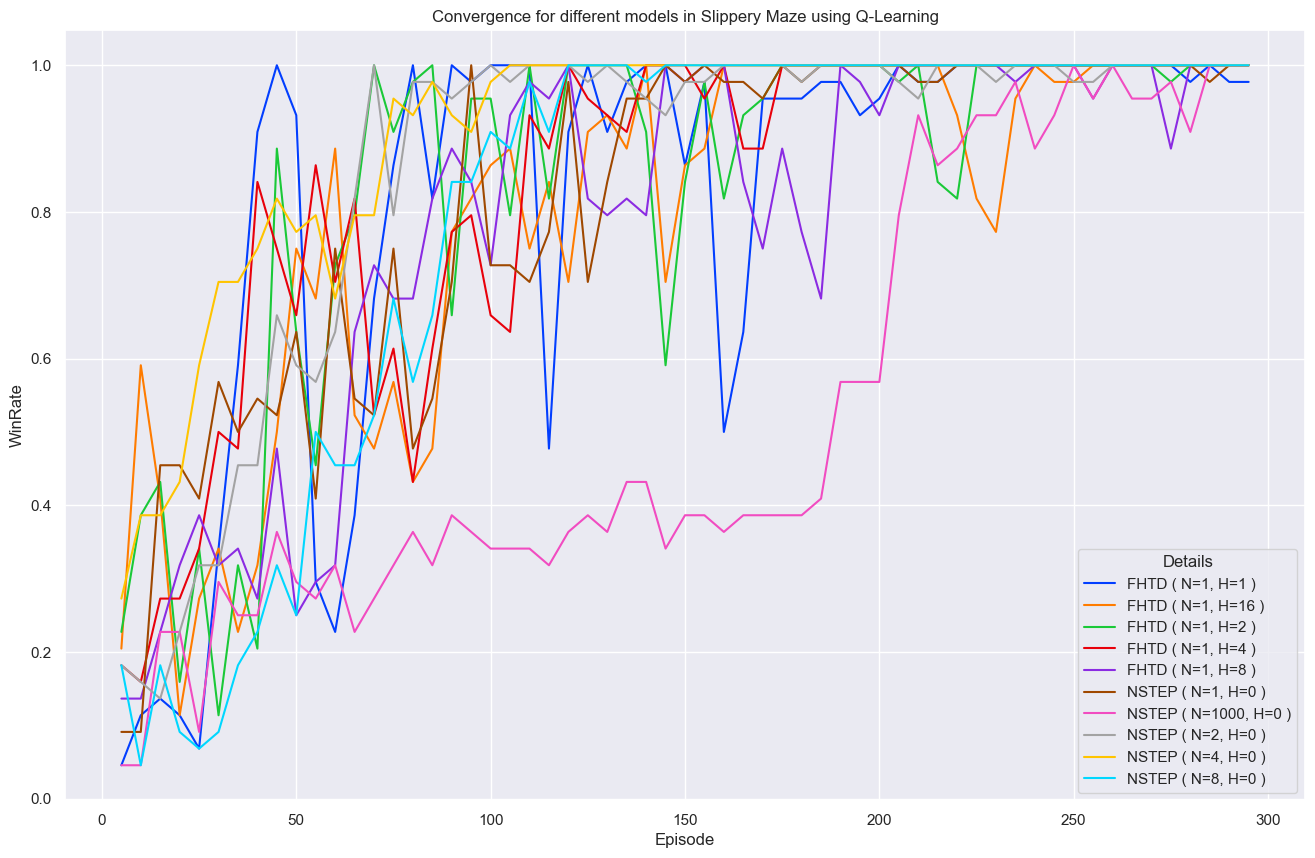

In [48]:
sns.lineplot( data=wr[(wr['Slippery']==True) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for different models in Slippery Maze using Q-Learning' )
plt.show( )

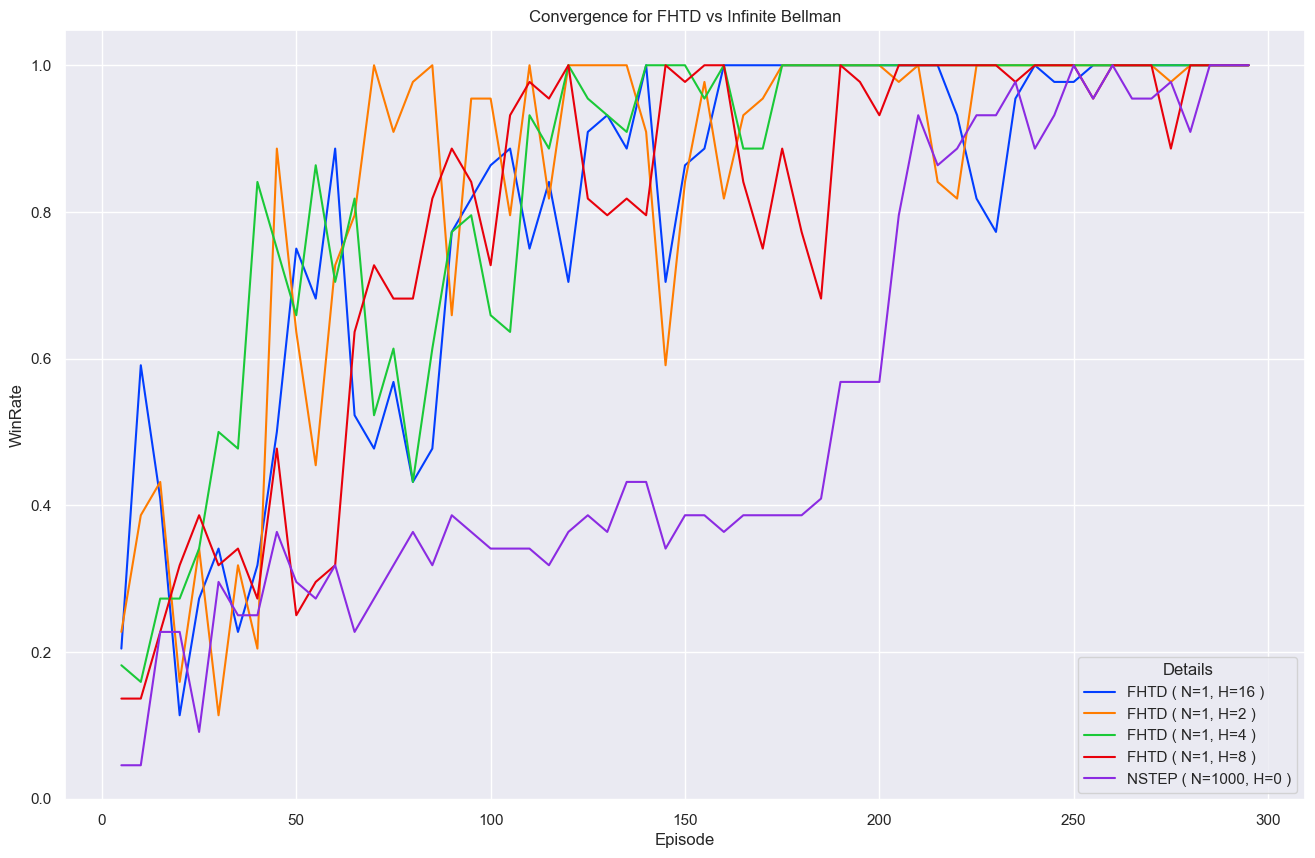

In [49]:
sns.lineplot( data=wr[(wr['Slippery']==True) & ( (wr['Horizon']>1) | (wr['Steps']==1000) ) & (wr['Episode']<300)], x='Episode', y='WinRate', hue='Details', palette='bright' )
plt.title( 'Convergence for FHTD vs Infinite Bellman' )
plt.show( )

# Mean Episode Length

In [50]:
me = pd.read_excel( 'MeanEpisodeLength.xlsx' )
me.sort_values( by=['MeanEpisodeLength'], ascending=False, inplace=True )
me['Details'] = me['Model'] + ' ( N=' + me['Steps'].astype(str) + ', H=' + me['Horizon'].astype(str) + ' )'
me.head( )

,Slippery,Model,Horizon,Steps,Alpha,MeanEpisodeLength,Details
0,True,NSTEP,0,1000,0.1,39.524,"NSTEP ( N=1000, H=0 )"
8,True,FHTD,1,1,0.1,38.810,"FHTD ( N=1, H=1 )"
7,True,FHTD,2,1,0.1,32.412,"FHTD ( N=1, H=2 )"
6,True,FHTD,4,1,0.1,30.708,"FHTD ( N=1, H=4 )"
2,True,NSTEP,0,8,0.1,30.202,"NSTEP ( N=8, H=0 )"


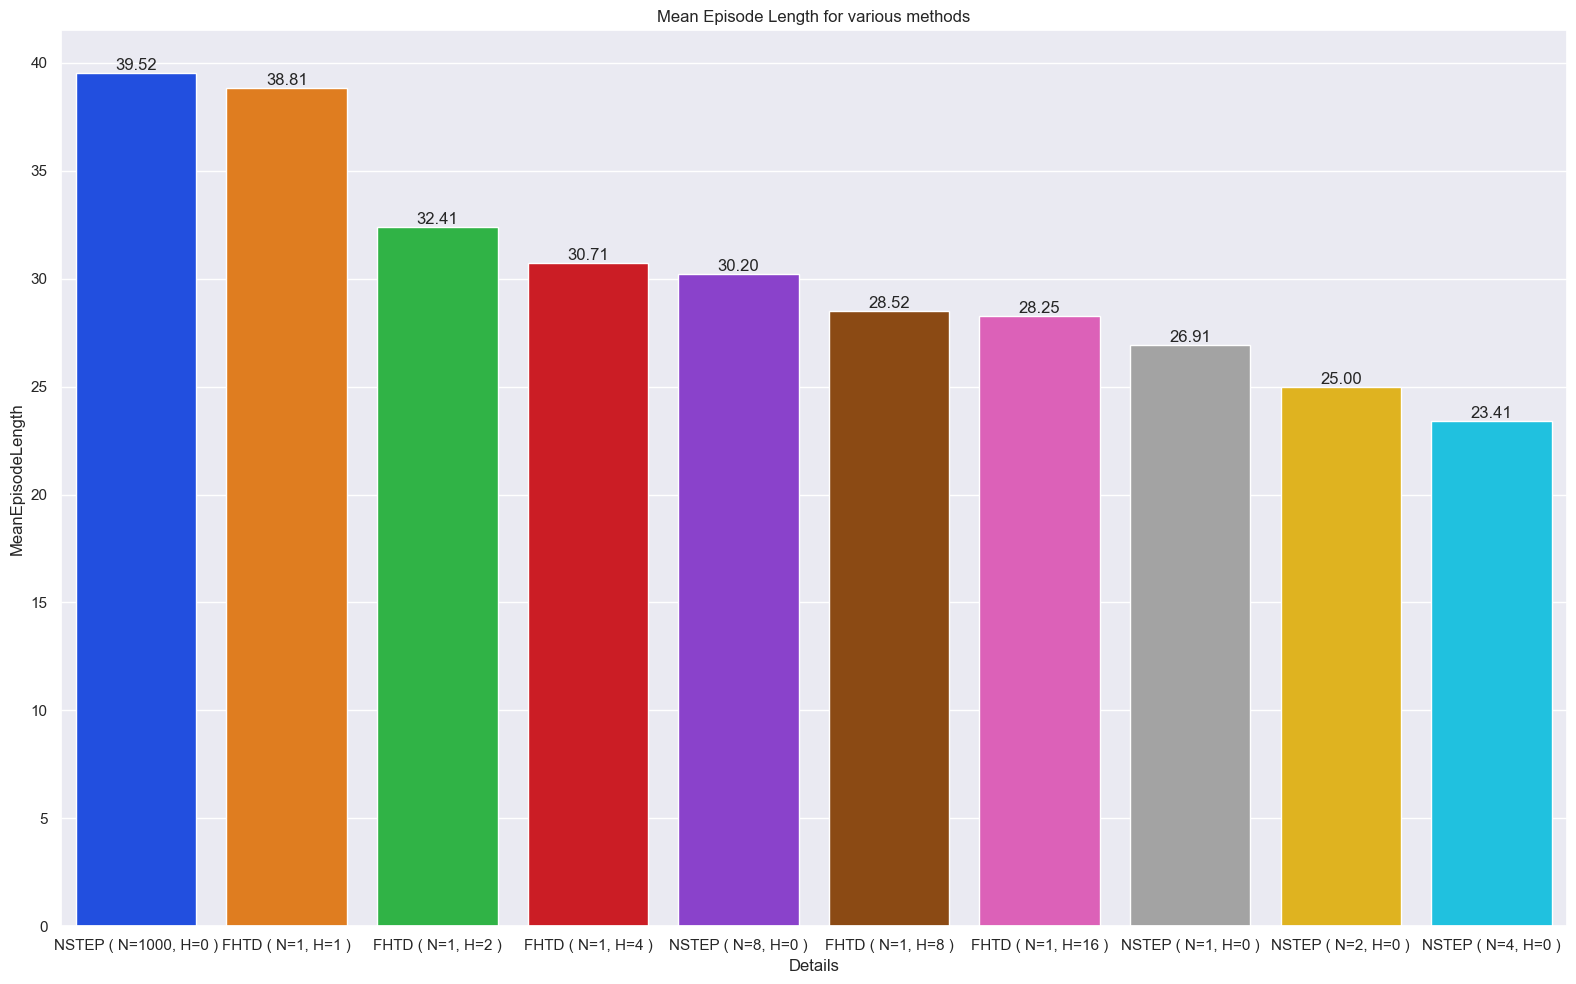

In [51]:
ax = sns.barplot( data=me[(me['Slippery']==True)], x='Details', y='MeanEpisodeLength', palette='bright' )

for container in ax.containers:
    ax.bar_label( container, fmt='%0.2f' )

plt.title( 'Mean Episode Length for various methods' )
plt.tight_layout( )
plt.show( )

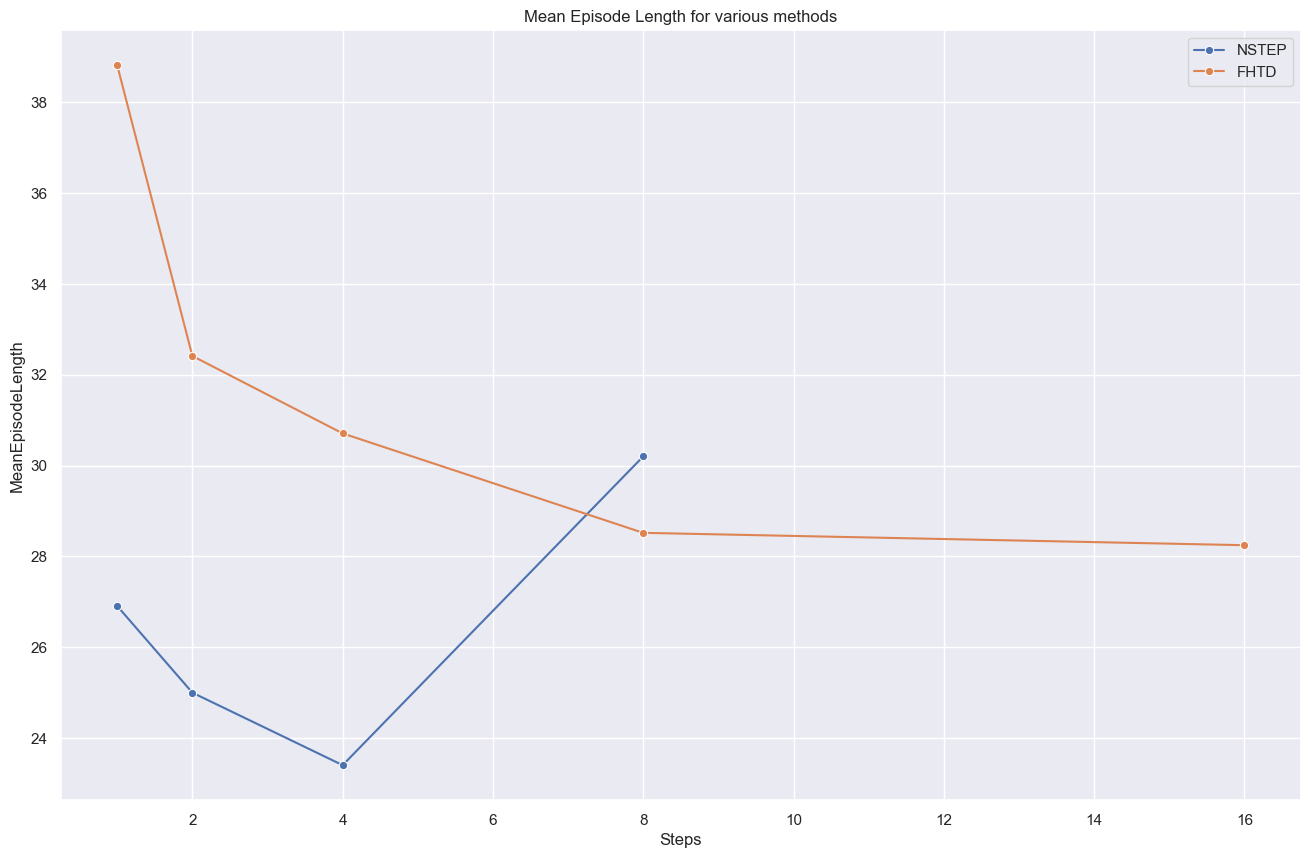

In [53]:
sns.lineplot( data=me[(me['Slippery']==True) & (me['Model']=='NSTEP') & (me['Steps']<=16)], x='Steps', y='MeanEpisodeLength', label='NSTEP', marker='o', palette='bright' )
sns.lineplot( data=me[(me['Slippery']==True) & (me['Model']=='FHTD')], x='Horizon', y='MeanEpisodeLength', label='FHTD', marker='o', palette='bright' )

plt.title( 'Mean Episode Length for various methods' )
plt.show( )